In [0]:
# Importing the required libraries
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date


# Machine Learning
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error


#Visualization
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')



In [0]:
#Importing and loading the dataset
data = pd.read_csv('supermarket_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [0]:
# Grouping the sales for all product categories for the given date
data['Date'] = pd.to_datetime(data['Date'])
data['day'] = data['Date'].dt.day 
data1 = data.groupby('Date')['Quantity'].sum().reset_index()
data1.head() 

,Date,Quantity
0,2019-01-01,81
1,2019-01-02,48
2,2019-01-03,37
3,2019-01-04,32
4,2019-01-05,55


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Quantity')

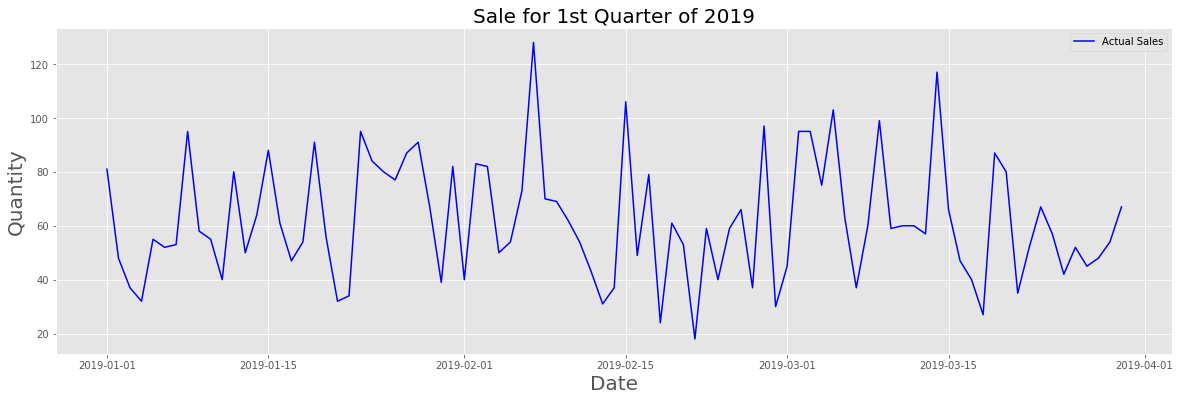

In [0]:
# Plotting the actual sales for three months 
plt.figure(figsize=([20,6]))
plt.plot_date(data1['Date'], data1['Quantity'], fmt='b-', xdate=True, ydate=False, label='Actual Sales')
plt.legend(loc='upper right')
plt.title('Sale for 1st Quarter of 2019',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Quantity',fontsize=20)

In [0]:
# We have converted the Dates from date format to integer format
import matplotlib.dates as mdates

data1['Date2num'] = data1['Date'].apply(lambda x: mdates.date2num(x))
date = data1.loc[:, ['Date']]
del data1['Date']

In [0]:
# Displaying the date1 dataframe
data1.head(10)

,Quantity,Date2num
0,81,737060.0
1,48,737061.0
2,37,737062.0
3,32,737063.0
4,55,737064.0
5,52,737065.0
6,53,737066.0
7,95,737067.0
8,58,737068.0
9,55,737069.0


In [0]:
m, n = data1.shape

date_test = date.loc[:np.floor(m*0.7)]
date_train = date.loc[np.floor(m*0.7):]

In [0]:
#Feature and target variable are assigned
X = data1['Date2num'].values.reshape(-1,1)
y = data1['Quantity'].values.reshape(-1,1)

In [0]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

In [0]:
#Linear regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Prediction
y_pred = regressor.predict(X_test)

In [0]:
#Creating the df dataframe containing the actual and the predicted values.
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,37,63.036555
1,64,62.276248
2,40,59.511494
3,54,60.340920
4,60,58.612949
5,82,61.101227
6,106,60.064444
7,31,60.202682
8,80,57.783522
9,67,57.092334


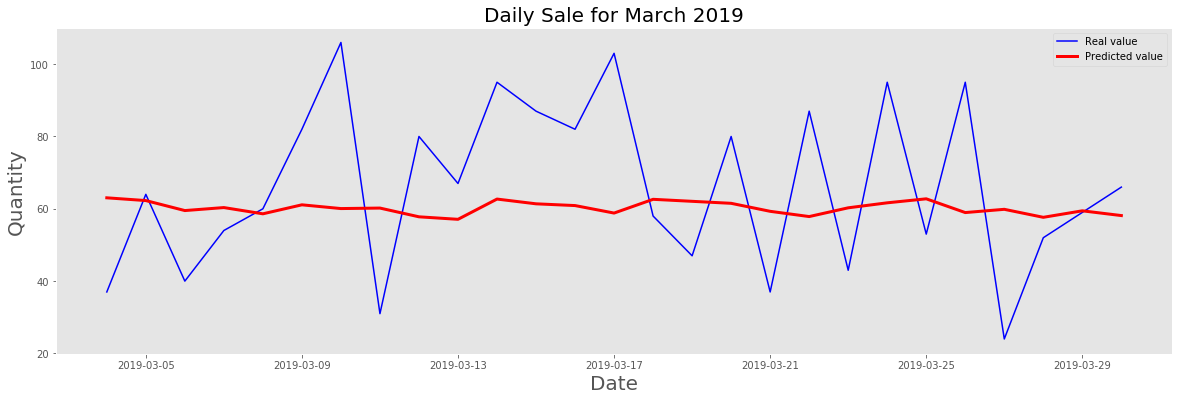

In [0]:
# Plotting the predicted values against the actual values for the month of march after training the values on january and february months.  
plt.figure(figsize=([20,6]))
plt.plot_date(date_train, y_test, fmt='b-', xdate=True, ydate=False, label='Real value')
plt.plot(date_train, y_pred, color='red', linewidth=3, label='Predicted value')
plt.legend(loc='upper right')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Quantity',fontsize=20)
plt.title('Daily Sale for March 2019',fontsize=20)
plt.grid()

plt.show()

In [0]:
#Mean Squared error
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()  
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

20.082932087765787